### Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

#### Neural network architecture

In [2]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Data Import

/home/ellzo/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:23<00:00, 1.12MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 242kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [02:16<00:00, 32.3kB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 15.9MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



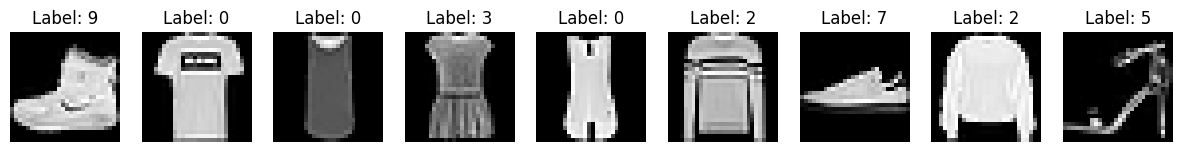

In [3]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
val_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

def visualize_samples(dataset, num_samples=9):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        image, label = dataset[i]
        axes[i].imshow(image.squeeze(), cmap="gray")
        axes[i].axis('off')
        axes[i].set_title(f"Label: {label}")
    plt.show()

visualize_samples(train_data)

### Modeling + Hyperparameter Optimization

In [ ]:
from genetic import GeneticTraining

hyperparams = {
    "lr": {"type": "exp", "min": 1e-3, "max": 1e-2},
    "batch_size": {"type": "int", "min": 32, "max": 128},
    "n_epochs": {"type": "int", "min": 4, "max": 8},
}

tuner = GeneticTraining(train_data, val_data, NN)

best_hyperparams = tuner.run_evolution(
    population_size=8,
    num_generations=4,
    hyperparams=hyperparams,
    crossover_rate=0.5,
    mutation_rate=0.2,
    mutation_std_factor=8,
    verbose=1
)

print("Best hyperparameters found:", best_hyperparams)

In [ ]:
import pandas as pd

df = pd.DataFrame(list(tuner.fitness_map.values()))

df.sort_values('val_accuracy', ascending=False)